# Project: Wrangling and Analyze Data

# Introduction
    Real-world data rarely comes clean. Using Python and its libraries, I will gather data from three of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. I will be documenting my wrangling efforts in this Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries)

## Dataset
The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user **@dog_rates**, also known as **WeRateDogs**. 
    
     WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.


## Project Steps Overview

    Step 1: Gathering data

    Step 2: Assessing data

    Step 3: Cleaning data

    Step 4: Storing data

    Step 5: Analyzing, and visualizing data

    Step 6: Reporting




In [1]:
#import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime as dt
import requests
import tweepy
import json
import time

from matplotlib import style

## Data Gathering

1. Downloaded ___twitter-archive-enhanced.csv___ directly from Udacity 


In [2]:
#t_archive = twitter_archive
t_archive = pd.read_csv('twitter-archive-enhanced.csv')
t_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


2. Using the Requests library to download the tweet image prediction file

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'   
response = requests.get(url)


with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    

In [4]:
#pred = image_predictions
pred = pd.read_csv('image-predictions.tsv',sep='\t')
pred.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Using the Tweepy library to query additional data via the Twitter API

In [5]:
# Using api credentials I got from twitter to assess the twitter API 


consumer_key =  'HIDDEN'
consumer_secret =   'HIDDEN'
access_token =  'HIDDEN'
access_secret =  'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)


Qwerying the API using using the tweets_id from t_archive for  favorites and retweets counts. Then storing the successful results in tweets_id_data whie the tweets id that are not found are stored in notweets_id_data

In [6]:
tweets_id_data = []
notweets_id_data = []
start = time.time()

for tweet_id in t_archive["tweet_id"]:
    try:
        
        tweet = api.get_status(tweet_id)._json
        favorites = tweet["favorite_count"]
        retweets = tweet["retweet_count"]
        
        tweets_id_data.append({"tweet_id" : int(tweet_id),
                              "favorites" : int(favorites),
                              "retweets" : int(retweets)})
    except Exception as e:
        notweets_id_data.append(tweet_id)
            
end = time.time()
print("The process took ", (end-start)," seconds to complete")
print(f' {len(tweets_id_data)} tweet id found')
print(f' {len(notweets_id_data)} tweet id not found')


Rate limit reached. Sleeping for: 332


The process took  3047.614481687546  seconds to complete
 2296 tweet id found
 60 tweet id not found


In [7]:
# Saving the results to tweets_json.txt
json_tweets = pd.DataFrame(tweets_id_data, columns=['tweet_id','favorites','retweets'])
json_tweets.to_csv('tweets_json.txt',encoding='utf-8',index=False)

In [8]:
tweet_data = pd.read_csv('tweets_json.txt')
tweet_data.head()

,tweet_id,favorites,retweets
0,892420643555336193,33695,6969
1,892177421306343426,29218,5272
2,891815181378084864,21973,3464
3,891689557279858688,36782,7191
4,891327558926688256,35178,7715


## Assessing Data


### Visual Assessment

__Twitter_archive Analysis__

In [9]:
t_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1732,679828447187857408,NaN,NaN,2015-12-24 00:58:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Everybody look at this beautiful pupper 13/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679828447...,13,10,None,None,None,pupper,None
846,766313316352462849,NaN,NaN,2016-08-18 16:38:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oscar. He has legendary eyebrows and h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766313316...,12,10,Oscar,None,None,None,None
638,793271401113350145,NaN,NaN,2016-11-01 02:00:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dave. It's his favorite day of the year. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793271401...,12,10,Dave,None,None,None,None
2274,667455448082227200,NaN,NaN,2015-11-19 21:32:34 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Reese and Twips. Reese protects Twips....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667455448...,7,10,Reese,None,None,None,None
376,828046555563323392,NaN,NaN,2017-02-05 01:04:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sailer. He waits on the roof for his o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828046555...,13,10,Sailer,None,None,None,None
1530,690021994562220032,NaN,NaN,2016-01-21 04:03:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Say hello to Geoff (pronounced ""Kyle""). He acc...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/690021994...,10,10,Geoff,None,None,None,None
316,834931633769889797,NaN,NaN,2017-02-24 01:03:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He decided it was time to part...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834931633...,12,10,Tucker,None,None,None,None
258,843604394117681152,NaN,NaN,2017-03-19 23:25:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hank. He's been outside for 3 minutes ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/843604394...,11,10,Hank,None,None,None,None
1435,697259378236399616,NaN,NaN,2016-02-10 03:22:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in saber-toothed tigers. T...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697259378...,8,10,getting,None,None,None,None
917,756939218950160384,NaN,NaN,2016-07-23 19:49:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jax. He is a majestic mountain pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756939218...,12,10,Jax,None,None,pupper,None


__Observations__

1. Retweets and reply are presents
2. The source column needs cleaning
3. Dog type is scattered in 4 colunms



In [10]:
pred.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
454,674764817387900928,https://pbs.twimg.com/media/CV0_BSuWIAIvE9k.jpg,2,Samoyed,0.634695,True,Arctic_fox,0.309853,False,kuvasz,0.019641,True
600,679736210798047232,https://pbs.twimg.com/media/CW7oelWWcAAhyzz.jpg,1,French_bulldog,0.319139,True,Chihuahua,0.154088,True,Cardigan,0.117688,True
708,685198997565345792,https://pbs.twimg.com/media/CYJQxvJW8AAkkws.jpg,1,dishwasher,0.888829,False,stove,0.013411,False,Old_English_sheepdog,0.009671,True
90,667538891197542400,https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg,1,Yorkshire_terrier,0.618957,True,silky_terrier,0.300313,True,Australian_terrier,0.053412,True
1969,868622495443632128,https://pbs.twimg.com/media/DA33i0XXsAEQtCA.jpg,1,Labrador_retriever,0.868107,True,Great_Pyrenees,0.060973,True,Saint_Bernard,0.033489,True
1039,712085617388212225,https://pbs.twimg.com/media/CeHWFksXIAAyypp.jpg,2,Shih-Tzu,0.625129,True,Tibetan_terrier,0.126897,True,Lhasa,0.119663,True
156,668826086256599040,https://pbs.twimg.com/media/CUglxbFXAAA5O0d.jpg,1,malinois,0.640185,True,Irish_terrier,0.153700,True,Rhodesian_ridgeback,0.068457,True
381,673317986296586240,https://pbs.twimg.com/media/CVgbIobUYAEaeI3.jpg,2,miniature_pinscher,0.384099,True,bloodhound,0.079923,True,Rottweiler,0.068594,True
1889,848324959059550208,https://pbs.twimg.com/media/C8XbDR1WAAAxND8.jpg,1,malamute,0.544576,True,Siberian_husky,0.290268,True,Eskimo_dog,0.154421,True
96,667724302356258817,https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg,1,ibex,0.619098,False,bighorn,0.125119,False,ram,0.074673,False


__Observations__
1. The names in the predictions are not uniforn some in lower case while others in mixed case


In [11]:
tweet_data.sample(20)

,tweet_id,favorites,retweets
1580,685268753634967552,2832,1070
283,836989968035819520,11923,2107
148,862096992088072192,66041,19903
1256,708349470027751425,2186,676
1593,684588130326986752,3802,1274
1438,693942351086120961,1619,328
2207,667766675769573376,371,185
1225,710296729921429505,2197,668
2275,666337882303524864,168,79
1917,673580926094458881,733,238


### Programatic  Assessment  

In [12]:
t_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

__Observations__
1. Timestamp column is in object format

In [13]:
t_archive.describe(include='all')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
count,2.356000e+03,7.800000e+01,7.800000e+01,2356,2356,2356,1.810000e+02,1.810000e+02,181,2297,2356.000000,2356.000000,2356,2356,2356,2356,2356
unique,NaN,NaN,NaN,2356,4,2356,NaN,NaN,181,2218,NaN,NaN,957,2,2,2,2
top,NaN,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/667152164...,NaN,NaN,None,None,None,None,None
freq,NaN,NaN,NaN,1,2221,1,NaN,NaN,1,2,NaN,NaN,745,2259,2346,2099,2326
mean,7.427716e+17,7.455079e+17,2.014171e+16,NaN,NaN,NaN,7.720400e+17,1.241698e+16,NaN,NaN,13.126486,10.455433,NaN,NaN,NaN,NaN,NaN
std,6.856705e+16,7.582492e+16,1.252797e+17,NaN,NaN,NaN,6.236928e+16,9.599254e+16,NaN,NaN,45.876648,6.745237,NaN,NaN,NaN,NaN,NaN
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,NaN,6.661041e+17,7.832140e+05,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,6.783989e+17,6.757419e+17,3.086374e+08,NaN,NaN,NaN,7.186315e+17,4.196984e+09,NaN,NaN,10.000000,10.000000,NaN,NaN,NaN,NaN,NaN
50%,7.196279e+17,7.038708e+17,4.196984e+09,NaN,NaN,NaN,7.804657e+17,4.196984e+09,NaN,NaN,11.000000,10.000000,NaN,NaN,NaN,NaN,NaN
75%,7.993373e+17,8.257804e+17,4.196984e+09,NaN,NaN,NaN,8.203146e+17,4.196984e+09,NaN,NaN,12.000000,10.000000,NaN,NaN,NaN,NaN,NaN


__Observations__
1. Colunms with empty values have None as a value which is not showing as Null or NaN(null object not null)



In [14]:
t_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [15]:
t_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

__Observations__
1. Lots of dog rating denominator greater than 10
2. Lots of dog rating numerator greater than 15

__Image_predictions Analysis__

In [16]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
pred.describe(include='all')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
count,2.075000e+03,2075,2075.000000,2075,2075.000000,2075,2075,2.075000e+03,2075,2075,2.075000e+03,2075
unique,NaN,2009,NaN,378,NaN,2,405,NaN,2,408,NaN,2
top,NaN,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,NaN,golden_retriever,NaN,True,Labrador_retriever,NaN,True,Labrador_retriever,NaN,True
freq,NaN,2,NaN,150,NaN,1532,104,NaN,1553,79,NaN,1499
mean,7.384514e+17,NaN,1.203855,NaN,0.594548,NaN,NaN,1.345886e-01,NaN,NaN,6.032417e-02,NaN
std,6.785203e+16,NaN,0.561875,NaN,0.271174,NaN,NaN,1.006657e-01,NaN,NaN,5.090593e-02,NaN
min,6.660209e+17,NaN,1.000000,NaN,0.044333,NaN,NaN,1.011300e-08,NaN,NaN,1.740170e-10,NaN
25%,6.764835e+17,NaN,1.000000,NaN,0.364412,NaN,NaN,5.388625e-02,NaN,NaN,1.622240e-02,NaN
50%,7.119988e+17,NaN,1.000000,NaN,0.588230,NaN,NaN,1.181810e-01,NaN,NaN,4.944380e-02,NaN
75%,7.932034e+17,NaN,1.000000,NaN,0.843855,NaN,NaN,1.955655e-01,NaN,NaN,9.180755e-02,NaN


__Tweet data Analysis__

In [18]:
tweet_data.describe()

,tweet_id,favorites,retweets
count,2.296000e+03,2296.000000,2296.000000
mean,7.426202e+17,7101.712108,2484.758275
std,6.824293e+16,10970.807740,4184.637777
min,6.660209e+17,0.000000,1.000000
25%,6.787514e+17,1258.750000,502.000000
50%,7.193536e+17,3098.000000,1177.000000
75%,7.987607e+17,8737.500000,2881.250000
max,8.924206e+17,144243.000000,70326.000000


## Assesment Summary

### Quality Issues (Issues with file content)

1. t_archive data - Timestamp column is in object format


2. t_archive data - Lots of dog rating numerator greater than 15


3. t_archive data - Lots of dog rating denuminator greater than  10


4. t_archive data - The source column needs cleaning


5. t_archive data - Colunms with empty values have None as a value which is not showing as Null or NaN(null object not null)


6. pred data - The names in the dog breed predictions are not uniform some in lower case while others in mixed case


7. t_archive data - Some dogs have invalid names


8. pred data - Three dog breed prediction available



9. all_merged- Retweets and reply present


10. all_merged-  Unnecessary columns


11. all_merged - Tweets without image


12. all_merged - Wrong assigned datatype



### Tidiness Issues (issues with file structure)
1. t_archive - Dog stage is scattered in 4 colunms


2. General - The three dataset have tweet id in common 

## Cleaning Data


In [19]:
# Making copies of original pieces of data
t_archive_clean = t_archive.copy()
pred_clean = pred.copy()
tweet_data_clean = tweet_data.copy()

### Issue #1: t_archive data - Timestamp column is in object format
    The datatype of the timestamp is in object but it needs to be in python's datetime datatype

#### Define:  
1. Convert datatype to datetime

#### Code

In [20]:
t_archive_clean.timestamp = pd.to_datetime(t_archive_clean.timestamp)

#### Test

In [21]:
t_archive_clean.timestamp.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2356 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype              
--------------  -----              
2356 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 18.5 KB


In [22]:
t_archive_clean.timestamp.describe(datetime_is_numeric=True)

count                                   2356
mean     2016-06-14 17:32:01.315789312+00:00
min                2015-11-15 22:32:08+00:00
25%      2015-12-20 02:18:04.750000128+00:00
50%                2016-04-11 20:47:24+00:00
75%      2016-11-17 19:43:58.249999872+00:00
max                2017-08-01 16:23:56+00:00
Name: timestamp, dtype: object

### Issue #2: t_archive data - Lots of dog rating numerator greater than 15
The ratings starts from 0 all the way up to 1776. While most of the ratings greater 15 seems to be error in the ratings extraction part

#### Define:  
1. Convert all ratings greater than 15 to 15

#### Code

In [23]:
t_archive_clean.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

Identifying all values greater than 15 in the rating_numerator colunm and making them 15

In [24]:
t_archive_clean.loc[t_archive_clean['rating_numerator'] > 15, 'rating_numerator'] = 15

#### Test

In [25]:
t_archive_clean.rating_numerator.value_counts()

12    558
11    464
10    461
13    351
9     158
8     102
7      55
14     54
5      37
6      32
15     28
3      19
4      17
1       9
2       9
0       2
Name: rating_numerator, dtype: int64

### Issue #3: t_archive data - Lots of dog rating denuminator greater than  10
Since the rating are always based on 10 why do we have both greater than and less than 10.

#### Define: Convert all value in rating denominator  to be the value 10.

#### Code

In [26]:
t_archive_clean.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

Setting all values in rating_denominator to 10

In [27]:
t_archive_clean.rating_denominator = 10

#### Test

In [28]:
t_archive_clean.rating_denominator.value_counts()


10    2356
Name: rating_denominator, dtype: int64

In [29]:
t_archive_clean.rating_denominator.describe()

count    2356.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

### Issue #4: t_archive data - The source column needs cleaning
    The source colunm contains html code but we only need the tweet source   

#### Define: 
1. identify all values in source colunm using value_counts() functions
2. Replacing html code with tweet source using a dictionary for the replace function

#### Code

In [30]:
t_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [31]:
t_archive_clean.source =t_archive_clean.source.replace(
    {'<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Vine - Make a Scene',
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter for iPhone',
    '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':'Twitter Web Client',
    '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'TweetDeck'})

#### Test

In [32]:
t_archive_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue #5: t_archive data - Colunms with empty values have None as a value which is not showing as Null or NaN(null object not null)
The Not null value "None" is represented as a value on its own


#### Define: 
1. Created a list of colunms that contains None Null values as Null
2. Using a for loop, I replaced all "None" values in colunms with the appropriate value Null value

#### Code

In [33]:
t_archive_clean.describe(exclude=["int","float"],datetime_is_numeric=True)

,timestamp,source,text,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo
count,2356,2356,2356,181,2297,2356,2356,2356,2356,2356
unique,NaN,4,2356,181,2218,957,2,2,2,2
top,NaN,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/667152164...,None,None,None,None,None
freq,NaN,2221,1,1,2,745,2259,2346,2099,2326
mean,2016-06-14 17:32:01.315789312+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2015-11-15 22:32:08+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2015-12-20 02:18:04.750000128+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2016-04-11 20:47:24+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2016-11-17 19:43:58.249999872+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2017-08-01 16:23:56+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [35]:
#To_none contains colunms in t_archive_clean that dosent have none values as None
to_none = ["name","doggo","floofer","pupper","puppo"]
for x in to_none:
    t_archive_clean.loc[t_archive_clean[x] == "None", x] = None


#### Test

In [36]:
t_archive_clean.describe(exclude=["int","float"],datetime_is_numeric=True)

,timestamp,source,text,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo
count,2356,2356,2356,181,2297,1611,97,10,257,30
unique,NaN,4,2356,181,2218,956,1,1,1,1
top,NaN,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/667152164...,a,doggo,floofer,pupper,puppo
freq,NaN,2221,1,1,2,55,97,10,257,30
mean,2016-06-14 17:32:01.315789312+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2015-11-15 22:32:08+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2015-12-20 02:18:04.750000128+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2016-04-11 20:47:24+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2016-11-17 19:43:58.249999872+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2017-08-01 16:23:56+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #6: pred data - The names in the dog breed predictions are not uniforn some in lower case while others in mixed case
    Names in dog breed predictions colunms are not formatted in the same way, some in lowercase some in carmel case

#### Define: 
1. A list of the affected colunms
2. Using a for loop, the first letter in each column value is capitalized using python string capitalize function

#### Code

In [38]:
pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [39]:
# to_capitalize contains list of colunms that would have their values capitalized 
to_capitalize = ["p1","p2","p3"]

for col in to_capitalize:
    pred_clean[col] = pred_clean[col].str.capitalize()

#### Test

In [40]:
pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #7: t_archive data- Some dogs have invalid names
Names like a, officially, getting and many more managed to sneek into the dog names

#### Define: 
1. Generated a list of invalid names and replacing them with Null

#### Code

In [41]:
t_archive_clean.name.value_counts()

a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
              ..
Aqua           1
Chase          1
Meatball       1
Rorie          1
Christoper     1
Name: name, Length: 956, dtype: int64

List of namems that were found to be invalid by me

In [42]:
invalid_names = ["a","an","the","very","O","his","all","unacceptable","actually","by","getting",
                 "incredibly","infuriating","just","life","light","mad","my","name","not","officially",
                 "old","one","quite","space","such","the","this","","",]
for name in invalid_names:
    t_archive_clean.name = t_archive_clean.name.replace(name,None)

#### Test

In [43]:
t_archive_clean.name.describe()

count        1501
unique        930
top       Charlie
freq           12
Name: name, dtype: object

Name lenght reduced from 956 to 949

Invalid names seems to be the ones in lower case

In [44]:

t_archive_clean.name.str.islower().sum()


0

### Issue #8: pred data - Three dog breed prediction available(p1,p2,p3)
The prediction file contained three dog breed prediction stored in "p1,p2,p3" columns respectively 

#### Define: 
    Since the predictions were based on how confident the model is ranked from best p1 to worst p3, p1 was choosen by me to be the dog breed predictions. 
    So i renamed p1,p1_conf, p1_dog to dog_breed, confidence, is_dog respectively 

#### Code

In [45]:
pred_clean.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [46]:
pred_clean.rename({"p1":"dog_breed","p1_conf":"confidence","p1_dog":"is_dog"},axis=1, inplace=True)

#### Test

In [47]:
pred_clean.head()

,tweet_id,jpg_url,img_num,dog_breed,confidence,is_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #9: t_archive - Dog stage is scattered in 4 colunms
dog stage was scattered in doggo,floofer,pupper,puppo colunms respectively 

#### Define: convert doggo ,floofer, pupper and puppo to a single column 

#### Code

In [48]:
t_archive_clean.describe(include="object")

,source,text,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo
count,2356,2356,181,2297,1501,97,10,257,30
unique,4,2356,181,2218,930,1,1,1,1
top,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/667152164...,Charlie,doggo,floofer,pupper,puppo
freq,2221,1,1,2,12,97,10,257,30


Using pandas melt function a achieve all dog stage in a single column 

In [49]:
not_melting = ["tweet_id","in_reply_to_status_id","in_reply_to_user_id","timestamp","source","text",
           "retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp",
           "expanded_urls","rating_numerator","rating_denominator","name"]
to_melt = ['doggo','floofer','pupper','puppo']

t_archive_clean = t_archive_clean.melt(id_vars=not_melting,
            value_vars=to_melt,
            var_name="stages",
            value_name="dog_stage",
            )


Using the melt function,the dog stages in individual column were melted into a single column. Stages colum was created but was dropped immediately since it wasnt necessary and the index was reset to make an evenly distributed index

In [50]:
t_archive_clean = t_archive_clean.sort_values("dog_stage").drop_duplicates(subset="tweet_id",keep="first")
t_archive_clean = t_archive_clean.drop("stages",axis=1)


In [51]:
t_archive_clean.reset_index(drop=True,inplace=True)


#### Test

In [52]:
t_archive_clean.dog_stage.value_counts()

pupper     245
doggo       97
puppo       29
floofer      9
Name: dog_stage, dtype: int64

In [53]:
t_archive_clean.describe(include="object")

,source,text,retweeted_status_timestamp,expanded_urls,name,dog_stage
count,2356,2356,181,2297,1501,380
unique,4,2356,181,2218,930,4
top,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/786963064...,Charlie,pupper
freq,2221,1,1,2,12,245


### Issue #10: General - The three dataset have tweet id in common
Each file has "tweet_id" colunm in common

#### Define: merge the three data set based on the tweeet id


#### Code

In [54]:
all_merged = pd.merge(t_archive_clean,pred_clean,on="tweet_id")

In [55]:
all_merged = pd.merge(all_merged,tweet_data_clean,on="tweet_id",how="right")

#### Test

In [56]:
all_merged

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,confidence,is_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,33695,6969
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,29218,5272
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,21973,3464
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,36782,7191
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,35178,7715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,88,36
2292,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True,246,115
2293,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,100,36
2294,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,112,39


### Issue #11: Rewteets and reply  present 
In both retweeted_status_id and in_reply_to_status_id there were values that cointained retweets and replies

#### Define: 
1. Dropped tweets with Retweet and reply status present

#### Code

In [57]:
all_merged_clean = all_merged.copy()

In [58]:
all_merged_clean = all_merged_clean[np.isnan(all_merged_clean['retweeted_status_id'])]

In [59]:
all_merged_clean = all_merged_clean[np.isnan(all_merged_clean['in_reply_to_status_id'])]

#### Test

In [60]:
all_merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2202 entries, 0 to 2295
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2202 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   1934 non-null   datetime64[ns, UTC]
 4   source                      1934 non-null   object             
 5   text                        1934 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1934 non-null   object             
 10  rating_numerator            1934 non-null   float64         

### Issue #12: Unnecessary Columns 

#### Define: Dropping colunms not needed for analysis

#### Code

In [61]:
drop_list=["in_reply_to_status_id","in_reply_to_user_id","retweeted_status_id",
           "retweeted_status_user_id","retweeted_status_timestamp",
           "expanded_urls","img_num","p2","p2_conf","p2_dog","p3","p3_conf","p3_dog"]

In [62]:
for col in drop_list:
    all_merged_clean.drop(col,axis=1,inplace=True)

#### Test

In [63]:
all_merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2202 entries, 0 to 2295
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2202 non-null   int64              
 1   timestamp           1934 non-null   datetime64[ns, UTC]
 2   source              1934 non-null   object             
 3   text                1934 non-null   object             
 4   rating_numerator    1934 non-null   float64            
 5   rating_denominator  1934 non-null   float64            
 6   name                1324 non-null   object             
 7   dog_stage           302 non-null    object             
 8   jpg_url             1934 non-null   object             
 9   dog_breed           1934 non-null   object             
 10  confidence          1934 non-null   float64            
 11  is_dog              1934 non-null   object             
 12  favorites           2202 non-null 

### Issue #12: Tweets that dosent have image 
Only tweets with image are needed for my analysis

#### Define: Droping tweets without "jpg_url"

#### Code

In [64]:
all_merged_clean.shape

(2202, 14)

In [65]:
all_merged_clean = all_merged_clean.dropna(subset="jpg_url")

#### Test

In [66]:
all_merged_clean.shape

(1934, 14)

### Issue #13: Wrong Datatype
Not all the datatype was captured by pandas

#### Define: convert  to correct datatype

#### Code

In [67]:
categorical =["dog_breed","dog_stage","source"]

for col in categorical:
    all_merged_clean[col]= all_merged_clean[col].astype("category")

In [68]:
all_merged_clean.rating_numerator = all_merged_clean.rating_numerator.astype(int)

#### Test

In [69]:
all_merged_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1934 entries, 0 to 2295
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1934 non-null   int64              
 1   timestamp           1934 non-null   datetime64[ns, UTC]
 2   source              1934 non-null   category           
 3   text                1934 non-null   object             
 4   rating_numerator    1934 non-null   int32              
 5   rating_denominator  1934 non-null   float64            
 6   name                1324 non-null   object             
 7   dog_stage           302 non-null    category           
 8   jpg_url             1934 non-null   object             
 9   dog_breed           1934 non-null   category           
 10  confidence          1934 non-null   float64            
 11  is_dog              1934 non-null   object             
 12  favorites           1934 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [70]:
twitter_archive_master = all_merged_clean.to_csv("twitter_archive_master.csv",index=False)
df = pd.read_csv("twitter_archive_master.csv")

## Analyzing and Visualizing Data


In [71]:
df

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_breed,confidence,is_dog,favorites,retweets
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,0.097049,False,33695,6969
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,29218,5272
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,21973,3464
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper_towel,0.170278,False,36782,7191
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,True,35178,7715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10.0,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_pinscher,0.560311,True,88,36
1930,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6,10.0,NaN,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,246,115
1931,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9,10.0,NaN,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,100,36
1932,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7,10.0,NaN,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826,True,112,39


In [72]:
df.describe(include="all")

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_breed,confidence,is_dog,favorites,retweets
count,1.934000e+03,1934,1934,1934,1934.000000,1934.0,1324,302,1934,1934,1934.000000,1934,1934.00000,1934.000000
unique,NaN,1934,3,1934,NaN,NaN,902,4,1934,373,NaN,2,NaN,NaN
top,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,Cooper,pupper,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Golden_retriever,NaN,True,NaN,NaN
freq,NaN,1,1897,1,NaN,NaN,10,201,1,136,NaN,1434,NaN,NaN
mean,7.366301e+17,NaN,NaN,NaN,10.572906,10.0,NaN,NaN,NaN,NaN,0.595767,NaN,7821.69183,2273.288521
std,6.756085e+16,NaN,NaN,NaN,2.227052,0.0,NaN,NaN,NaN,NaN,0.272253,NaN,11438.30882,4041.915242
min,6.660209e+17,NaN,NaN,NaN,0.000000,10.0,NaN,NaN,NaN,NaN,0.044333,NaN,66.00000,11.000000
25%,6.763054e+17,NaN,NaN,NaN,10.000000,10.0,NaN,NaN,NaN,NaN,0.363478,NaN,1712.25000,509.250000
50%,7.094295e+17,NaN,NaN,NaN,11.000000,10.0,NaN,NaN,NaN,NaN,0.588620,NaN,3535.00000,1099.500000
75%,7.890806e+17,NaN,NaN,NaN,12.000000,10.0,NaN,NaN,NaN,NaN,0.848955,NaN,9760.25000,2585.750000


In [73]:
df.corr()

,tweet_id,rating_numerator,rating_denominator,confidence,is_dog,favorites,retweets
tweet_id,1.000000,0.516411,NaN,0.097940,0.120491,0.610125,0.382347
rating_numerator,0.516411,1.000000,NaN,0.096298,0.280834,0.374235,0.282533
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN,NaN
confidence,0.097940,0.096298,NaN,1.000000,0.124601,0.066572,0.044730
is_dog,0.120491,0.280834,NaN,0.124601,1.000000,0.042346,0.000957
favorites,0.610125,0.374235,NaN,0.066572,0.042346,1.000000,0.928297
retweets,0.382347,0.282533,NaN,0.044730,0.000957,0.928297,1.000000


### Analysis 
1. How is the dog stage distributed in the data
2. what are the top  10 dog breeds
3. Source of tweet distribution 
4. Visualize the high correlation between favorites and retweets counts
5. Dog rating distribution 

### Visualization

#### 1. How is the dog stage distributed in the data

Using value_counts() function to sort dog stage by count

In [74]:
dog_stage = df.dog_stage.value_counts()
dog_stage

pupper     201
doggo       72
puppo       22
floofer      7
Name: dog_stage, dtype: int64

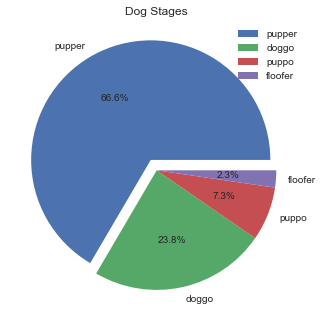

In [75]:
plt.style.use("seaborn")
my_labels=["pupper","doggo","puppo","floofer"]
my_explode=[0.1,0,0,0]


plt.pie(x=dog_stage,labels=my_labels,explode=my_explode,autopct='%1.1f%%')
plt.title("Dog Stages")
plt.legend()
plt.show()

#### 2. What are the top  10 dog breeds

In [76]:
dog_breeds = df.dog_breed.value_counts().head(10)
dog_breeds

Golden_retriever      136
Labrador_retriever     90
Pembroke               86
Chihuahua              74
Pug                    52
Chow                   41
Samoyed                39
Pomeranian             37
Toy_poodle             36
Malamute               29
Name: dog_breed, dtype: int64

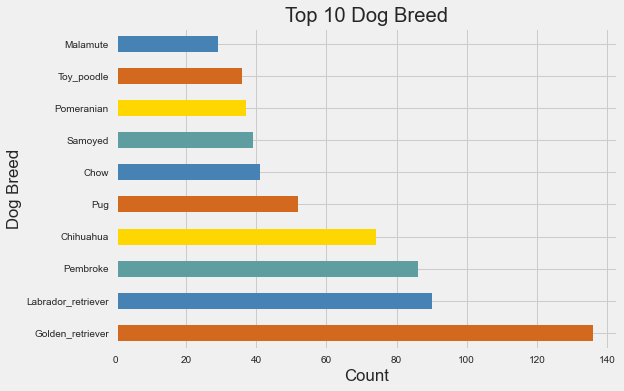

In [77]:
plt.style.use("fivethirtyeight")
my_color=["chocolate","steelblue","cadetblue","gold"]

dog_breeds.plot(kind="barh",color=my_color)
plt.xlabel("Count")
plt.ylabel("Dog Breed")
plt.title("Top 10 Dog Breed")
plt.show()

#### 3. Source of tweet distribution 

In [78]:
source = df.source.value_counts()
source

Twitter for iPhone    1897
Twitter Web Client      27
TweetDeck               10
Name: source, dtype: int64

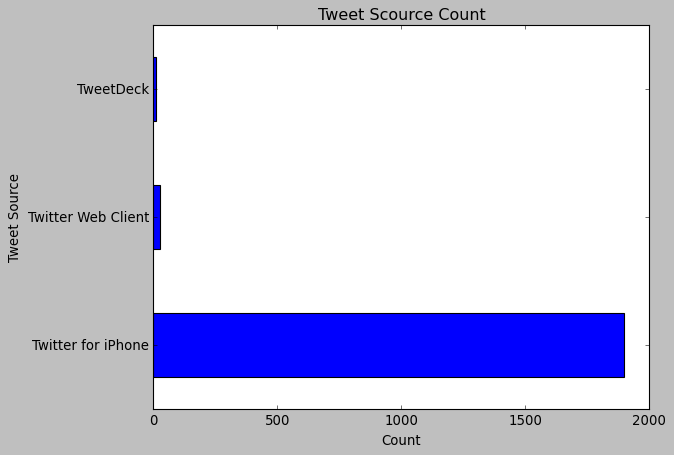

In [79]:
plt.style.use("classic")
source.plot(kind="barh",grid=False)

plt.xlabel("Count")
plt.ylabel("Tweet Source")
plt.title("Tweet Scource Count")
plt.show()

#### 4. Visualizing the high correlation between favorites and retweets counts

Here, i'm trying to plot a line chart showing the high correlation between favorites and retweet count but showing the full amount of data makaes the graph unpleasant. so i went with showing the first 150 tweets

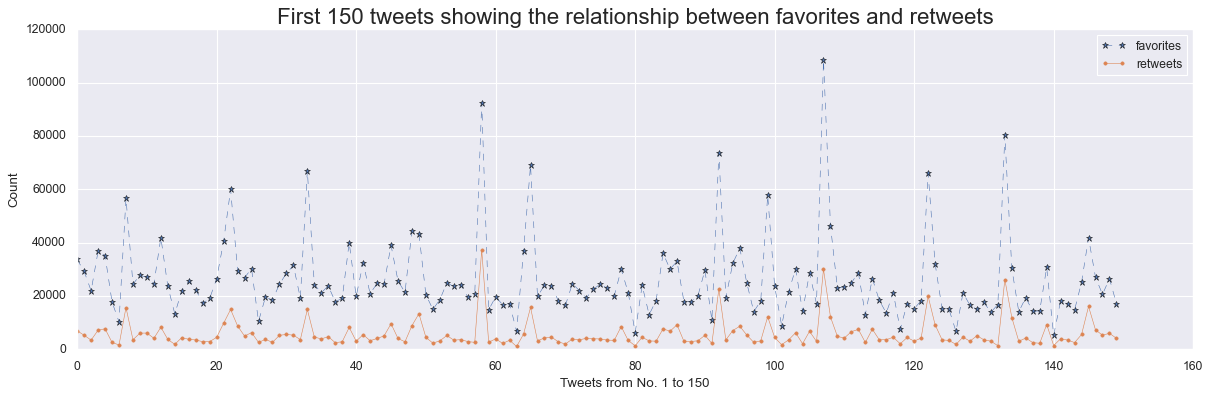

In [80]:
x1 = df.favorites.head(150)
x2 = df.retweets.head(150)
sns.set(rc={"figure.figsize":(18,5)})

fig, ax = plt.subplots()
ax.plot(x1,label="favorites",linewidth=0.5,linestyle="--",marker="*")
ax.plot(x2,label="retweets",linewidth=0.5,marker=".")
plt.xlabel("Tweets from No. 1 to 150")
plt.ylabel("Count")
plt.title("First 150 tweets showing the relationship between favorites and retweets",fontsize=20)
plt.legend()
plt.show()


#### 5. Dog rating distribution 

In [81]:
df.head(0)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_breed,confidence,is_dog,favorites,retweets


In [82]:
dog_rating = df.rating_numerator.value_counts(sort=False,ascending=False)
dog_rating.sort_index(inplace=True)
dog_rating


0       1
1       5
2       9
3      19
4      16
5      33
6      30
7      50
8      93
9     148
10    404
11    388
12    438
13    249
14     33
15     18
Name: rating_numerator, dtype: int64

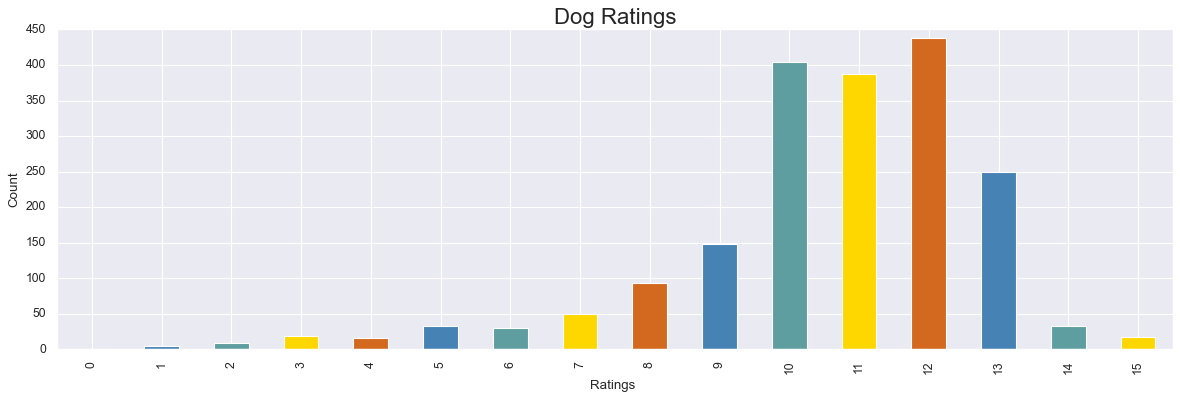

In [83]:
dog_rating.plot(kind="bar",color=my_color)

plt.title("Dog Ratings",fontsize=20)
plt.xlabel("Ratings ")
plt.ylabel("Count")
plt.show()

### Insights:
1. "Pupper" was the most common dog stage having a whooping 66.6% of the dog stage.

2. The most popular dog breed goes to "Golden retriever"

3. Iphone dominated in the source of tweets

4. The more the favourite count the more  retweet the post gets

5. 12/10 is the most common rating given to dogs rated by WeRateDogs.